# 18 - 异质干预效应与个性化

## 从预测到因果推理
 
在上一章中，我们简要介绍了机器学习模型。 ML 模型是用于我所说的预测的工具，或者更专业地说，是估计条件期望函数 \\(E[Y|X]\\)。换句话说，当您想从已知输入 \\(X\\) （如英语句子、本月销售、大脑扫描图像）映射到最初未知但定义明确的输出 \\(Y \\)（如日语句子、下个月的销售额或癌症诊断）。因此，如果 ML 处理预测或估计 \\(E[Y|X]\\)，为了使其有用，您必须将您想用 ML 解决的任何问题框定为预测问题，即估计 \\(E[Y|X]\\) 是关键。我们在上一章中介绍了这样一个例子。在那里，我们必须根据客户的特定特征来预测客户的盈利能力：\\(E[NetValue|Age, Income, Region]\\)。这些信息非常有用，因为它使我们能够集中精力与盈利客户打交道，而不是与非盈利客户开展业务。在这里，很好地预测盈利能力是关键。
 
请注意，在您将自己从数据生成过程中移除的意义上，这是一种被动的估计方法。在我们的示例中，我们假设给出了客户盈利能力“净值”。我们所要做的就是估计它。换句话说，我们假设除了预测客户的盈利能力外，我们无能为力。我们不能增加它，也不能减少它。但这并不总是正确的。事实上，很多时候，公司都有可以用来提高客户盈利能力的杠杆。这些杠杆的范围可以从优质或更便宜的客户服务到折扣、价格或营销。在行业中，经常会出现我们被插入到数据生成过程中的情况。我们可以影响它。因此，作为在该行业工作的数据科学家，我们经常必须回答最佳行动方案或干预措施，以优化某些业务指标，通常是盈利能力或其他一些中间指标，如转换、成本或销售额。
 
在这个我们不是被动观察的世界中，估计 \\(E[Y|X]\\) 并不是全部。这是我们进入因果推理的地方。我们需要在条件期望函数中添加另一部分，也就是对我们参与数据生成过程进行建模的部分，即干预本身：
 
$$
E[Y|X, T]
$$
 
我们现在必须区分上下文或外生特征\\(X\\) 和处理\\(T\\)。两者都会影响结果 \\(Y\\)，但是虽然我们无法控制 \\(X\\)，但我们可以决定 \\(T\\) 将取什么值，或者至少对其进行干预。举个具体的例子，\\(Y\\) 可能是一天的销售额，\\(X\\) 可能是您无法控制的上下文特征，但它会为您提供有关销售的信息，例如前几天，\\(T\\) 是您可以干预以增加销售额的处理变量，例如价格、商品库存水平或营销。因果推理是在上下文 \\(X\\) 下估计 \\(T\\) 和 \\(Y\\) 之间因果关系的过程。一旦我们这样做了，优化 \\(Y\\) 只是以最佳方式设置处理 \\(T\\) 的问题
 
$$
\underset{T}{argmax} \ E[Y|X, T]
$$
 
 
从这个意义上说，除了因果推理的积极方面，我们还有一个规范的动机。
 
在第一部分，我们试图回答诸如学校教育的价值是什么？法律变化可以降低吸烟水平吗？我们可以通过积极的心态来提高学业成绩吗？酒精对死亡率的影响是什么？从理解世界如何运作的纯科学观点来看，所有这些问题都很有趣。但它们背后也有实际的动机。如果我们知道学校教育对收入的影响，我们就可以理解为此付出的合理价格。用数学术语来说，我们所做的是估计学校教育的因果推理并对其进行优化：\\(\underset{Educ}{argmax} \ E[Income|X, Educ]\\)。
 
第一部分的重点是回答干预总体上是积极的、强的还是零。例如，我们想知道一般而言，投资于教育是否是一个好主意。同样在第一部分中，\\(X\\) 的作用是双重的。首先，\\(X\\) 可能包含混杂因素，在这种情况下，因果效应只有在我们考虑或调整 \\(X\\) 时才能识别。或者，\\(X\\) 可以减少因果估计的方差。如果 \\(X\\) 是 \\(Y\\) 的良好预测器，我们可以用它来解释 \\(Y\\) 的方差，从而使因果效应更加明显。
 
现在，事情将变得不那么黑白分明了。我们想要的不仅仅是平均干预效果。我们将允许干预对某些人产生积极影响，但对其他人则不然。上下文特征 \\(X\\) 将在定义不同的单位配置文件中发挥作用，每个配置文件可能对处理的反应不同。我们现在想要

## 从 ATE 到 CATE
 
 
到目前为止，我们每次估计干预的因果影响时，都是平均干预效果（或者有时是局部平均干预效果）：
 
$$
E[Y_1−Y_0]
$$
 
或等效的连续干预
 
$$
E[y'(t)]
$$
 
其中 \\(y'(t)\\) 是响应函数或结果的处理导数。我们已经学会了揭示干预的一般有效性的技术。 ATE 估计是因果推理的基础。对于我们称为程序评估的决策问题，它是一个超级有用的工具。我们想知道我们是否应该向整个人群推出一种干预方法。不要被公共政策条款所迷惑。评估国家教育或健康计划有效性的相同技术也可用于了解推出新产品对公司底线的影响。这里要注意的关键是我们想要告知的决定是我们是否应该干预。
 
现在，我们将尝试告知另一种类型的决定：**我们干预谁**？现在，我们允许决定从一个单元更改为另一个单元。干预一个单位而不是另一个单位可能是有益的。我们希望个性化干预。用更专业的术语来说，我们想要估计条件平均干预效果 (CATE)
 
$$
E[Y_1−Y_0 | X] \ \text{或} \ E[y'(t)|X]
$$
 
对 \\(X\\) 的条件化意味着我们现在允许处理效果根据每个单元的特性而有所不同。同样，在这里，我们认为并非所有实体对干预的反应都一样好。我们希望利用这种异质性。我们只想处理正确的单位（在二元情况下）或弄清楚每个单位的最佳干预程度是多少（在连续情况下）。
 
例如，如果您是一家必须决定每个客户有资格获得贷款的银行，那么您可以确定向所有人提供大量资金并不是一个好主意——尽管这对某些人来说可能是合理的。您必须明智地对待您的干预手段（贷款金额）。也许，根据客户的信用评分 (\\(X\\))，您可以找出合适的贷款剂量。当然，您无需成为大型机构即可利用个性化。不乏适用的例子。您应该在一年中的哪几天进行销售？你应该为任何产品收取多少费用？对每个人来说，多少运动量才算过量运动量？
 
这样想吧。您有一群客户和一种待遇（价格、折扣、贷款……）。您想要个性化的待遇，例如，给不同的客户不同的折扣。
 
![img](./data/img/causal-model/customers.png)
 
为此，您必须对客户进行细分。您创建了对您的干预有不同反应的小组。例如，您希望找到对折扣反应良好的客户和对折扣反应不佳的客户。好吧，客户对处理的反应由条件处理效果 \\(\frac{\delta Y}{ \delta T}\\) 给出。因此，我们可以以某种方式估计，对于每个客户，我们可以将那些对干预反应很好（高干预效果）和那些对干预反应不佳的人分组在一起。如果我们这样做，我们会像下图那样拆分客户空间。
 
![img](./data/img/causal-model/elast-partition.png)
 
这将是美妙的，因为现在我们将能够估计每个分区上的不同处理效果或弹性。请注意，弹性只是从 \\(T\\) 到 \\(Y\\) 的直线或函数的斜率。因此，如果我们可以生成斜率或弹性不同的分区，这意味着这些分区上的实体对处理具有不同的响应性。
 
![img](./data/img/causal-model/elast-split.png)
 
换句话说，您想要摆脱以原始形式预测 \\(Y\\) 并开始预测 \\(Y\\) 在 \\(T\\) 上的导数，\\( \frac{\delta Y}{ \delta T}\\) 为每个单位。例如，假设 \\(Y\\) 是冰淇淋销量，\\(T\\) 是冰淇淋价格，每个单位 \\(i\\) 是一天。让我们把道德问题放在一边，为了争论，假装你每天都能改变冰淇淋的价格。如果您能以某种方式找到 \\(\frac{\delta Sales}{ \delta Price}\\) **低的日子**，那么您可以**提高价格** 而不会在那些日子损失太多销售额。也许你已经这样做了，比如说，当你在假期增加它们时。关键是，根据价格弹性来区分日期是很有用的，因为它为您提供了如何以最佳方式设定价格的基础。
 
好吧，你可能会说，但这有点棘手。如果我看不到弹性 \\(\frac{\delta Sales}{ \delta Price}\\)，如何预测它？这是一个很好的观点。弹性在单位级别上基本上是不可观察的。不仅如此，这是一个奇怪的概念。我们更习惯于从原始数量的角度来思考，而不是根据这些相同数量的变化率来思考。因此，为了更好地概念化弹性，这里有一个小技巧。您可以将每个实体视为具有 \\(Y_i\\) 值，在我们的示例中为销售额，但也具有个体弹性 \\(\frac{delta Y_i}{\delta T_i}\\)。弹性是 \\(Y\\) 随 \\(T\\) 变化的程度，因此您可以考虑每个实体也具有与其相关联的斜率系数 \\(\frac{\delta Y}{ \delta T}_i\\)。在我们的示例中，我们会说每一天的销售价格都有一个斜率系数。
 
![img](./data/img/causal-model/elasticity.png)
 
当然，我们看不到那些单独的斜率系数。为了让我们看到各个斜率，我们必须每天在两个不同的价格下观察，并计算每个价格的销售额如何变化。
 
$$
\frac{\delta Y_i}{ \delta T_i} \近似 \frac{Y(T_i) - Y(T_i + \epsilon)}{T_i - (T_i + \epsilon)}
$$
 
这又是因果推理的根本问题。我们永远无法在不同的处理条件下看到相同的单元。所以，我们能做些什么？

## 预测弹性
 
我们在这里陷入了复杂的境地。我们已经同意我们需要预测 \\(\frac{\delta Y_i}{ \delta T_i}\\)，遗憾的是这是不可观察的。因此，我们不能使用 ML 算法并将其作为目标插入。但也许我们不需要观察 \\(\frac{\delta Y_i}{ \delta T_i}\\) 来预测它
 
这是一个想法。如果我们使用线性回归呢？
 
![img](./data/img/causal-model/linear-fix.png)
 
假设您将以下线性模型拟合到您的数据中。
 
$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + e_i
$$
 
如果你在干预变量上区分它，你最终会得到
 
$$
\frac{\delta y_i}{\delta t_i} = \beta_1
$$
 
既然你可以估计上面的模型得到 \\(\hat{\beta_1}\\)，我们甚至可以大胆地说**即使你无法观察到弹性，你也可以预测它**。在上面的例子中，这是一个相当简单的预测，即我们为每个人预测常数值 \\(\hat{\beta_1}\\)。那是一些东西，但还不是我们想要的。那是ATE，不是CATE。这无助于我们根据实体对干预的反应程度对实体进行分组的任务，因为每个人都得到相同的弹性预测。但是，我们可以做以下简单的改变
 
$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 t_i X_i + e_i
$$
 
这反过来会给我们以下弹性预测
 
$$
\widehat{\frac{\delta y_i}{\delta t_i}} = \hat{\beta_1} + \hat{\beta_3}X_i
$$
 
其中 \\(\beta_3\\) 是 \\(X\\) 中特征的向量系数。
 
现在由不同的 \\(X_i\\) 定义的每个实体将有不同的弹性预测。换句话说，弹性预测会随着 \\(X\\) 的变化而变化。唉，回归可以为我们提供一种估计 CATE \\(E[y'(t)|X]\\) 的方法。
 
我们终于到了某个地方。上面的模型允许我们对每个实体进行弹性预测。通过这些预测，我们可以创建更多有用的组。我们可以将具有高预测弹性的单元组合在一起。我们可以对预测弹性低的那些做同样的事情。最后，通过我们的弹性预测，我们可以根据我们认为实体对干预的反应程度对它们进行分组。
 
理论到此为止。是时候通过一个示例来说明如何制作这种弹性模型了。让我们考虑一下我们的冰淇淋示例。每个单位 \\(i\\) 是一天。对于每一天，我们都知道是否是工作日，制作冰淇淋的成本是多少（您可以将成本视为质量的代表）以及当天的平均温度。这些将是我们的特征空间 \\(X\\)。然后，我们有我们的干预手段、价格和我们的结果，即售出的冰淇淋数量。对于这个例子，我们将考虑随机处理，这样我们现在不必担心偏差。

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [2]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
print(prices_rnd.shape)
prices_rnd.head()

(5000, 5)


,temp,weekday,cost,price,sales
0,25.8,1,0.3,7,230
1,22.7,3,0.5,4,190
2,33.7,7,1.0,5,237
3,23.0,4,0.5,5,193
4,24.4,1,1.0,3,252


请记住我们的目标：我们需要根据具体的“功能”、“临时”、“工作日”和“成本”来决定何时收取更多费用以及何时收取更少费用。 如果这是目标，则需要评估干预效果异质性模型在实现该目标方面的有用性。 我们稍后会谈到这一点（下一章会详细介绍）。 现在，让我们将数据集拆分为训练和测试集。

In [3]:
np.random.seed(123)
train, test = train_test_split(prices_rnd)

现在我们有了训练数据，我们需要建立一个模型，让我们能够区分价格弹性高的日子和价格弹性低的日子。 我们这样做的方法是简单地预测价格弹性。 具体如何？ 首先，让我们考虑使用以下线性模型
 
$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2}X_i + e_i
$$
 
如果我们检查这个模型的参数，我们可以看到我们预测的弹性会是什么样子。

In [4]:
m1 = smf.ols("sales ~ price + temp+C(weekday)+cost", data=train).fit()
m1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,186.7113,1.770,105.499,0.000,183.241,190.181
C(weekday)[T.2],-25.0512,0.924,-27.114,0.000,-26.863,-23.240
C(weekday)[T.3],-24.5834,0.901,-27.282,0.000,-26.350,-22.817
C(weekday)[T.4],-24.3807,0.897,-27.195,0.000,-26.138,-22.623
C(weekday)[T.5],-24.9036,0.894,-27.850,0.000,-26.657,-23.150
C(weekday)[T.6],-24.0921,0.903,-26.693,0.000,-25.862,-22.323
C(weekday)[T.7],-0.8635,0.888,-0.972,0.331,-2.605,0.878
price,-2.7515,0.106,-25.970,0.000,-2.959,-2.544
temp,1.9848,0.060,33.117,0.000,1.867,2.102
cost,4.4718,0.528,8.462,0.000,3.436,5.508


对于 \\(m1\\)，预测的价格弹性 \\(\widehat{\dfrac{\delta y_i}{\delta t_i}}\\) 将由 \\(\hat{\beta_1}\\ )，在我们的例子中是 -2.75。这意味着，我们为冰淇淋收取的每额外巴西雷亚尔，我们预计销售额将下降约 3 个单位。
 
注意这个 \\(m1\\) 如何为每个人预测完全相同的弹性。因此，如果我们想知道人们在哪些日子对冰淇淋价格不那么敏感，这不是一个很好的模型。当我们在这里需要的是 CATE 时，它会估计 ATE。请记住，我们的目标是以这样一种方式对实体进行分区，以便我们可以针对每个单独的分区个性化和优化我们的处理（价格）。如果每个预测都相同，我们就无法进行分区。我们没有区分敏感单位和非敏感单位。为了纠正这一点，考虑我们的第二个模型：
 
$$
sales_i = \beta_0 + \beta_1 price_i + \beta_2 price_i * temp_i * + \pmb{\beta_3}X_i + e_i
$$
 
第二个模型包括价格和温度之间的**交互项**。这意味着它允许弹性在不同温度下有所不同。我们在这里实际上要说的是，人们对价格上涨或多或少敏感，具体取决于温度。

In [5]:
m2 = smf.ols("sales ~ price*temp + C(weekday) + cost", data=train).fit()
m2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,192.4767,4.371,44.037,0.000,183.907,201.046
C(weekday)[T.2],-25.0805,0.924,-27.143,0.000,-26.892,-23.269
C(weekday)[T.3],-24.5871,0.901,-27.290,0.000,-26.354,-22.821
C(weekday)[T.4],-24.4225,0.897,-27.231,0.000,-26.181,-22.664
C(weekday)[T.5],-24.8953,0.894,-27.844,0.000,-26.648,-23.142
C(weekday)[T.6],-24.1269,0.903,-26.726,0.000,-25.897,-22.357
C(weekday)[T.7],-0.8581,0.888,-0.966,0.334,-2.599,0.883
price,-3.6299,0.618,-5.873,0.000,-4.842,-2.418
temp,1.7459,0.176,9.912,0.000,1.401,2.091
price:temp,0.0366,0.025,1.443,0.149,-0.013,0.086


一旦我们估计模型，预测的弹性由下式给出
 
$$
\widehat{\frac{\delta sales_i}{\delta price_i}} = \hat{\beta_1} + \hat{\beta_3}temp_i
$$
 
请注意，\\(\hat{\beta_3}\\) 为正 0,03，基线弹性 \\(\beta_1\\)（在 \\(0C^o\\) 处的弹性）为 -3.6。这意味着，平均而言，随着我们提高价格，销售额下降，这是有道理的。这也意味着温度每升高一度，人们对冰淇淋价格上涨的敏感度就会降低（尽管幅度不大）。例如，在 \\(25C^o\\)，我们每多收取一次巴西雷亚尔，我们的销售额就会下降 2.8 个单位 \\((-3.6 + (0.03 * 25))\\)。但是在 \\(35C^o\\)，我们每多收取一次巴西雷亚尔，它们只会下降 2.5 个单位 \\((-3.6 + (0.03 * 35))\\)。这也是一种直觉。随着天气越来越热，人们愿意为冰淇淋支付更多费用。
 
我们可以走得更远。下一个模型包括所有特征空间的交互项。这意味着弹性会随着温度、星期几和成本而变化。
 
$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2 X_i}*price_i + \pmb{\beta_3}X_i + e_i
$$

In [6]:
m3 = smf.ols("sales ~ price*cost + price*C(weekday) + price*temp", data=train).fit()

根据上述模型，单位水平弹性或 CATE 将由下式给出
 
$$
\frac{\delta 销售额}{\delta 价格} = \beta_1 + \pmb{\beta_2 X_i}
$$
 
其中 \\(\beta_1\\) 是价格系数，\\(\pmb{\beta_2}\\) 是交互系数的向量。
 
最后，让我们看看如何实际做出这些弹性预测。一种方法是从模型中提取弹性参数并使用上面的公式。但是，我们将采用更一般的近似值。由于弹性只不过是干预结果的导数，我们可以使用导数的定义。
 
$$
\frac{\delta y}{\delta t} = \dfrac{y(t+\epsilon) - y(t)}{ (t + \epsilon) - t }
$$
 
随着 \\(\epsilon\\) 变为零。我们可以通过将 \\(\epsilon\\) 替换为 1 来近似这个定义。
 
$$
\frac{\delta y}{\delta t} \近似 \hat{y}(t+1) - \hat{y}(t)
$$
 
其中 \\(\hat{y}\\) 由我们模型的预测给出。换句话说，我将用我的模型做出两个预测：一个传递原始数据，另一个传递原始数据，但处理增加一个单位。这些预测之间的差异是我的 CATE 预测。
 
下面，您可以看到执行此操作的函数。由于我们使用了训练集来估计我们的模型，我们现在将对测试集进行预测。首先，让我们使用我们的第一个 ATE 模型 \\(m1\\)。

In [7]:
def pred_elasticity(m, df, t="price"):
    return df.assign(**{
        "pred_elast": m.predict(df.assign(**{t:df[t]+1})) - m.predict(df)
    })

pred_elasticity(m1, test).head()

,temp,weekday,cost,price,sales,pred_elast
2648,18.6,7,0.5,10,185,-2.751463
2456,26.0,3,0.5,10,200,-2.751463
4557,23.7,3,0.3,8,192,-2.751463
4884,28.9,4,1.5,6,213,-2.751463
92,23.7,1,0.5,8,207,-2.751463


使用 \\(m1\\) 进行弹性预测并不好玩。 我们可以看到它预测了所有日子的完全相同的值。 那是因为该模型上没有交互项。 但是，如果我们使用 \\(m3\\) 进行预测，它会为每天输出不同的弹性预测。 那是因为现在，弹性或干预效果取决于当天的具体特征。

In [8]:
pred_elast3 = pred_elasticity(m3, test)

np.random.seed(1)
pred_elast3.sample(5)

,temp,weekday,cost,price,sales,pred_elast
4764,31.1,6,1.0,3,212,1.144309
4324,24.8,7,0.5,10,182,-9.994303
4536,25.0,2,1.5,6,205,0.279273
3466,26.0,3,1.5,3,205,0.308320
115,19.3,3,0.3,9,177,-0.349745


请注意预测是如何从 -9 变为 1 的数字。这些不是销售列的预测，其数量级为数百。相反，**这是一个预测，如果我们将价格提高一个单位，销售额会发生多少变化**。在赌注之外，我们可以看到一些奇怪的数字。例如，看一下第 4764 天。它预测的是正弹性。换句话说，我们预测如果我们提高冰淇淋的价格，销售额将会增加。这不符合我们的经济意识。可能是模型对该预测进行了一些奇怪的外推。幸运的是，您不必为此担心太多。请记住，我们的最终目标是根据单位对干预的敏感程度来划分单位。 **不是**提出有史以来最准确的弹性预测。对于我们的主要目标，如果弹性预测根据单元的敏感程度对单元进行排序就足够了。换句话说，即使像 1.1 或 0.5 这样的正弹性预测没有多大意义，我们所需要的只是排序正确，也就是说，我们希望预测为 1.1 的单位比单位受价格上涨的影响更小预测为 0.5。
 
好的，我们有弹性或 CATE 模型。但仍然存在一个潜在的问题：它们与 ML 预测模型相比如何？现在让我们试试吧。我们将使用机器学习算法，使用价格、温度、工作日和成本作为特征 \\(X\\) 并尝试预测冰淇淋销售。

In [9]:
X = ["temp", "weekday", "cost", "price"]
y = "sales"
ml = GradientBoostingRegressor()
ml.fit(train[X], train[y])

# make sure the model is not overfiting.
ml.score(test[X], test[y])

0.9124088322890127

该模型可以预测我们每天的销售额。 但它适合我们真正想要的吗？ 换句话说，这个模型能区分人们对冰淇淋价格更敏感的日子吗？ 它可以帮助我们根据价格敏感度决定收取多少费用吗？
 
要查看哪个模型更有用，让我们尝试使用它们来分割个体单元。 对于每个模型，我们将个体单元分成 2 组。 我们希望一个群体对价格上涨反应灵敏，而另一个群体则反应不大。 如果是这样的话，我们可以围绕这些群体组织我们的业务：对于属于高响应群体的日子，我们最好不要将价格定得太高。 对于低响应群体，我们可以提高价格而不会冒太大的销售风险。

In [10]:
bands_df = pred_elast3.assign(
    elast_band = pd.qcut(pred_elast3["pred_elast"], 2), # create two groups based on elasticity predictions 
    pred_sales = ml.predict(pred_elast3[X]),
    pred_band = pd.qcut(ml.predict(pred_elast3[X]), 2), # create two groups based on sales predictions
)

bands_df.head()

,temp,weekday,cost,price,sales,pred_elast,elast_band,pred_sales,pred_band
2648,18.6,7,0.5,10,185,-10.301045,"(-10.597999999999999, -0.00555]",186.878081,"(161.089, 198.735]"
2456,26.0,3,0.5,10,200,0.036165,"(-0.00555, 1.389]",203.188327,"(198.735, 257.746]"
4557,23.7,3,0.3,8,192,-0.132057,"(-10.597999999999999, -0.00555]",188.800637,"(161.089, 198.735]"
4884,28.9,4,1.5,6,213,0.860663,"(-0.00555, 1.389]",210.430813,"(198.735, 257.746]"
92,23.7,1,0.5,8,207,-9.953698,"(-10.597999999999999, -0.00555]",209.044522,"(198.735, 257.746]"


接下来，我们需要比较这两个人群分层模型哪一个是最好的。 我现在可能有点超前了，因为我们只会在下一章中讨论 CATE 模型评估。 但我觉得我可以让你尝尝它的样子。 检查这些分层模式有多好的一种非常简单的方法 - 我的意思是好用 - 就是绘制每个分区的销售价格回归线。 我们可以通过 Seaborn 的 `regplot` 和 `FacetGrid` 轻松实现这一点。
 
下面，我们可以看到使用弹性预测进行的分层。 请记住，所有这些都是在测试集中完成的。

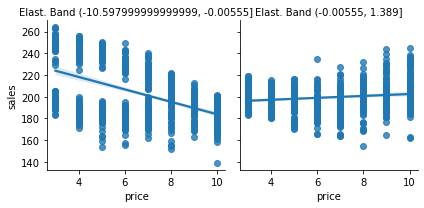

In [11]:
g = sns.FacetGrid(bands_df, col="elast_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Elast. Band {col_name}");

正如我们所看到的，看起来这种分层方案很有用。 对于第一个分层，价格敏感性很高。 随着价格的上涨，销售额下降了很多。 然而，对于第二个分层，随着价格的上涨，销售大致保持不变。 事实上，当我们提高价格时，甚至看起来销量也在上升，但这可能是噪音。

现在与使用 ML 预测模型进行的用户分层进行对比：

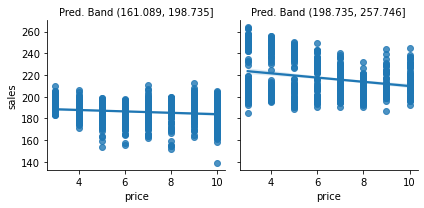

In [12]:
g = sns.FacetGrid(bands_df, col="pred_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Pred. Band {col_name}");

我真的很喜欢这个图，因为它传达了一个非常重要的观点。如您所见，预测模型分层在 y 轴上分割个体单元。如第一幅图所示，在第一个分层所对应的日子里，我们没有售出很多冰淇淋，但在第二个分层对应那些日子里，我们确实卖得更多。我觉得这很神奇，因为预测模型正在做它应该做的事情：它预测销售。它可以区分冰淇淋销售量低和高的日子。
 
唯一的问题是预测在这里并不是特别有用。最终，我们想知道什么时候可以提高价格，什么时候不能。但是，一旦我们查看预测模型分层中线的斜率，我们就会发现它们并没有太大变化。换句话说，由预测模型定义的两个分层对价格上涨的反应大致相同。这并没有让我们深入了解哪些日子可以提高价格，因为看起来价格根本不会影响销售。
 
## 关键思想
 
我们最终正式确定了条件平均干预效果的概念以及它如何对个性化有用。即，如果我们能了解每个单位对一种干预的反应，即如果我们能了解干预效果的异质性，我们就可以根据单位的个体特点给予最好的干预。
 
我们还将这个目标与预测模型的目标进行了对比。也就是说，我们正在重新考虑估计任务，从预测原始格式的 \\(Y\\) 到预测 \\(Y\\) 如何随 \\(T\\)、\\(\frac{\delta y}{\delta t}\\)。
 
可悲的是，如何为此构建模型并不明显。由于我们不能直接观察弹性，因此很难建立一个预测它的模型。但是线性回归拯救了我们。通过使用适合预测 \\(Y\\) 的回归模型，我们找到了一种方法来预测 \\(\frac{\delta y}{\delta t}\\)。我们还必须包括干预和特征的交互项。这使得我们对每个客户的弹性预测都不同。换句话说，我们现在正在估计 \\(E[T'(t) | X]\\)。然后使用这些弹性预测将我们的单位分组为或多或少对干预敏感，最终帮助我们确定每组的干预水平。
 
![img](./data/img/causal-model/economists.png)
 
所有这一切引发的一个自然问题是，我们是否可以用通用机器学习模型替换线性回归并使用它来预测弹性。答案是肯定的，但有一些需要注意的地方。本章使用了一个非常简单的 CATE 模型，因为我认为使用线性回归更容易理解它们背后的概念。不过不用担心。我们将在接下来的章节中看到一些更复杂的模型。但在此之前，我首先需要介绍一个非常重要的话题，即我们如何比较两个 CATE 模型并决定哪个更好。